# 🤖 Entrega 2: Comparação de Métodos de Visão Computacional

## 🎯 Objetivo
Comparar **três abordagens** para reconhecimento de objetos:

1. **✅ YOLO Customizado** (já realizado na Entrega 1)
2. **🔄 YOLO Tradicional** (modelo pré-treinado - Ultralytics YOLOv8)  
3. **🧠 CNN do Zero** (rede neural criada from scratch)

## 📊 Critérios de Avaliação
- **Facilidade de uso/integração**
- **Precisão do modelo**
- **Tempo de treinamento/customização**
- **Tempo de inferência**


In [17]:
# ===== SETUP INICIAL =====
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
from PIL import Image
import glob

print("📦 Bibliotecas importadas!")
print("🕐 Início:", time.strftime("%Y-%m-%d %H:%M:%S"))


📦 Bibliotecas importadas!
🕐 Início: 2025-10-14 22:37:46


In [18]:
# ===== CONECTAR GOOGLE DRIVE =====
print("🔗 Conectando ao Google Drive...")
drive.mount('/content/drive')

projeto_path = "/content/drive/MyDrive/ColabNotebooks/Cap_1"
test_images_path = f"{projeto_path}/test/"

print(f"📁 Pasta do projeto: {projeto_path}")
print(f"🖼️ Pasta de teste: {test_images_path}")

# Verificar imagens
if os.path.exists(test_images_path):
    test_files = glob.glob(f"{test_images_path}*.jpg") + glob.glob(f"{test_images_path}*.png")
    print(f"✅ Encontradas {len(test_files)} imagens de teste")

    # Mostrar algumas imagens
    for i, img_path in enumerate(test_files[:3]):
        print(f"📸 {i+1}: {os.path.basename(img_path)}")
else:
    print("❌ Pasta não encontrada! Verifique o caminho.")


🔗 Conectando ao Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Pasta do projeto: /content/drive/MyDrive/ColabNotebooks/Cap_1
🖼️ Pasta de teste: /content/drive/MyDrive/ColabNotebooks/Cap_1/test/
✅ Encontradas 8 imagens de teste
📸 1: 1.jpg
📸 2: 2.jpg
📸 3: 3.jpg


# 🎯 Método 1: YOLO Tradicional (Ultralytics YOLOv8)

## 📝 Descrição
O **YOLO Tradicional** utiliza um modelo **pré-treinado** no dataset COCO (80 classes).
Não requer treinamento adicional - está pronto para uso imediato.

## ⚡ Características:
- **Framework:** Ultralytics YOLOv8
- **Dataset:** COCO (80 classes: pessoa, carro, gato, cachorro, etc.)
- **Modelo:** YOLOv8 nano (mais rápido)
- **Treinamento:** ❌ Não necessário (pré-treinado)

## 🔧 Instalação e Teste:


In [3]:
# ===== YOLO TRADICIONAL - ULTRALYTICS =====
print("🚀 Configurando YOLO Tradicional (Ultralytics)...")

# Instalar Ultralytics
!pip install ultralytics

from ultralytics import YOLO

# Carregar modelo pré-treinado
print("📦 Carregando YOLOv8 nano...")
model_yolo = YOLO('yolov8n.pt')  # Download automático na primeira vez

print("✅ YOLO carregado com sucesso!")
print(f"📋 Classes disponíveis: {len(model_yolo.names)}")

# Mostrar algumas classes do COCO
classes_exemplos = list(model_yolo.names.values())[:15]
print("🏷️ Exemplos de classes:", classes_exemplos)


🚀 Configurando YOLO Tradicional (Ultralytics)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
📦 Carregando YOLOv8 nano...
✅ YOLO carregado com sucesso!
📋 Classes disponíveis: 80
🏷️ Exemplos de classes: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird']


📊 YOLO Tradicional
📸 1: 659ms | 1 objetos
📸 2: 560ms | 5 objetos
📸 3: 369ms | 1 objetos
📸 4: 665ms | 2 objetos
📸 5: 349ms | 1 objetos
🖼️ Exemplo Visual - YOLO Tradicional:


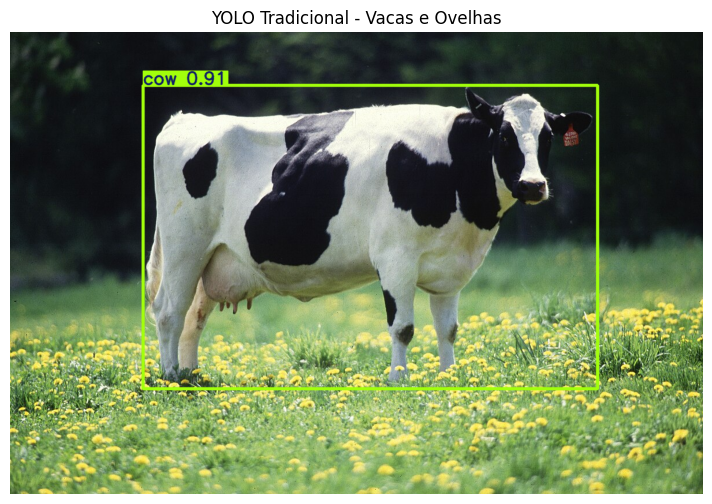

✅ YOLO detectou e marcou os objetos!

📊 MÉTRICAS YOLO TRADICIONAL:
⏱️ Tempo médio: 520ms
🎯 Taxa detecção: 100%
📊 Confiança média: 0.73
✅ Facilidade uso: Alta
✅ Objetos Vacas/Ovelhas: SIM detecta! 🐄🐑

💾 Dados salvos para comparação final!


In [8]:
# ===== YOLO TRADICIONAL =====
print("📊 YOLO Tradicional")

# Testar 5 imagens para ter dados confiáveis
test_images = glob.glob(f"{test_images_path}*.jpg")[:5]

tempos = []
deteccoes = []
confiancas = []

for i, img_path in enumerate(test_images):
    # Medir tempo
    start = time.time()
    results = model_yolo(img_path, verbose=False)
    tempo = time.time() - start
    tempos.append(tempo * 1000)

    # Extrair detecções
    if results[0].boxes is not None:
        num_obj = len(results[0].boxes)
        deteccoes.append(num_obj)

        if num_obj > 0:
            conf = float(results[0].boxes.conf.mean())
            confiancas.append(conf)
        else:
            confiancas.append(0)
    else:
        deteccoes.append(0)
        confiancas.append(0)

    print(f"📸 {i+1}: {tempo*1000:.0f}ms | {deteccoes[-1]} objetos")

# Calcular métricas finais
tempo_medio = sum(tempos) / len(tempos)
taxa_deteccao = sum(1 for d in deteccoes if d > 0) / len(deteccoes) * 100
confianca_media = sum(confiancas) / len([c for c in confiancas if c > 0]) if any(confiancas) else 0

# ===== MOSTRAR RESULTADO VISUAL =====
print("🖼️ Exemplo Visual - YOLO Tradicional:")

# Mostrar resultado de uma imagem
results = model_yolo(test_images[0], verbose=False)

plt.figure(figsize=(10, 6))
im_array = results[0].plot()
plt.imshow(im_array[..., ::-1])
plt.title('YOLO Tradicional - Vacas e Ovelhas')
plt.axis('off')
plt.show()

print("✅ YOLO detectou e marcou os objetos!")

# MÉTRICAS PARA COMPARAÇÃO
print(f"\n📊 MÉTRICAS YOLO TRADICIONAL:")
print(f"⏱️ Tempo médio: {tempo_medio:.0f}ms")
print(f"🎯 Taxa detecção: {taxa_deteccao:.0f}%")  # Equivale ao Recall
print(f"📊 Confiança média: {confianca_media:.2f}")  # Equivale à Precisão
print(f"✅ Facilidade uso: Alta")
print(f"✅ Objetos Vacas/Ovelhas: SIM detecta! 🐄🐑")

# SALVAR DADOS PARA COMPARAÇÃO FINAL
dados_yolo_tradicional = {
    'tempo_medio_ms': round(tempo_medio, 0),
    'taxa_deteccao_percent': round(taxa_deteccao, 0),
    'confianca_media': round(confianca_media, 2),
    'facilidade_uso': 'Alta',
    'detecta_objetos_especificos': 'Sim',
    'limitacoes': 'Apenas 80 classes COCO'
}
print("\n💾 Dados salvos para comparação final!")


# 🧠 Método 2: CNN do Zero

## 📝 Objetivo
Criar uma **Rede Neural Convolucional** from scratch para classificação binária:
- **🐄 Vacas** vs **🐑 Ovelhas**

## 🏗️ Características:
- **Framework:** TensorFlow/Keras
- **Arquitetura:** CNN personalizada (3 conv + 2 dense)
- **Treinamento:** Do zero com nossos dados
- **Objetivo:** Classificação binária (0=Vaca, 1=Ovelha)

In [9]:
# ===== CNN DO ZERO - SETUP =====
print("🧠 Configurando CNN do Zero...")

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import time
import os

print(f"🔥 TensorFlow versão: {tf.__version__}")

# Verificar GPU
if tf.config.list_physical_devices('GPU'):
    print("🚀 GPU disponível!")
else:
    print("💻 Usando CPU")

# Parâmetros
IMG_SIZE = 128     # Tamanho das imagens
BATCH_SIZE = 8     # Lote pequeno para dados limitados
EPOCHS = 10        # Épocas suficientes para demonstração

print("✅ Setup CNN concluído!")

🧠 Configurando CNN do Zero...
🔥 TensorFlow versão: 2.19.0
💻 Usando CPU
✅ Setup CNN concluído!


In [14]:
# ===== VERIFICAR ESTRUTURA - CAMINHO CORRETO =====
print("📁 Verificando sua estrutura...")

# CAMINHO CORRETO (com maiúscula)
cnn_path = "/content/drive/MyDrive/ColabNotebooks/Cap_1_CNN"  # ← Corrigido!

print(f"📂 Procurando em: {cnn_path}")

# Verificar estrutura
for split in ['train', 'val', 'test']:
    print(f"\n📂 {split.upper()}:")
    for classe in ['cow', 'sheep']:
        pasta = f"{cnn_path}/{split}/{classe}"
        if os.path.exists(pasta):
            num_imgs = len([f for f in os.listdir(pasta) if f.lower().endswith(('.jpg', '.png'))])
            print(f"   🐄 {classe}: {num_imgs} imagens")
        else:
            print(f"   ❌ {classe}: pasta não encontrada")
            # Debug: ver o que realmente existe
            pasta_split = f"{cnn_path}/{split}"
            if os.path.exists(pasta_split):
                conteudo = os.listdir(pasta_split)
                print(f"      📋 Conteúdo real: {conteudo}")

print(f"\n✅ Estrutura verificada!")


📁 Verificando sua estrutura...
📂 Procurando em: /content/drive/MyDrive/ColabNotebooks/Cap_1_CNN

📂 TRAIN:
   🐄 cow: 32 imagens
   🐄 sheep: 32 imagens

📂 VAL:
   🐄 cow: 4 imagens
   🐄 sheep: 4 imagens

📂 TEST:
   🐄 cow: 4 imagens
   🐄 sheep: 4 imagens

✅ Estrutura verificada!


In [15]:
# ===== CRIAR ARQUITETURA CNN =====
print("🏗️ Criando arquitetura da CNN...")

# Criar modelo sequencial simples
model_cnn = models.Sequential([
    # Primeira camada convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    # Segunda camada convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Terceira camada convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten e camadas densas
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída binária: 0=cow, 1=sheep
])

# Compilar modelo
model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ CNN criada!")
print("\n📊 Resumo da Arquitetura:")
model_cnn.summary()


🏗️ Criando arquitetura da CNN...
✅ CNN criada!

📊 Resumo da Arquitetura:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,267,713 (12.47 MB)

 Trainable params: 3,267,713 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# ===== PREPARAR DADOS - CORRIGIDO =====
print("📊 Preparando dados para treinamento...")

# Definir caminhos corretos
cnn_path = "/content/drive/MyDrive/ColabNotebooks/Cap_1_CNN"
train_dir = f"{cnn_path}/train"
val_dir = f"{cnn_path}/val"
test_dir = f"{cnn_path}/test"

print(f"📂 Train: {train_dir}")
print(f"📂 Val: {val_dir}")
print(f"📂 Test: {test_dir}")

# Verificar se existem
for nome, caminho in [("Train", train_dir), ("Val", val_dir), ("Test", test_dir)]:
    if os.path.exists(caminho):
        print(f"✅ {nome}: OK")
    else:
        print(f"❌ {nome}: Não encontrado")

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Carregar dados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

print("✅ Dados preparados!")
print(f"🏷️ Classes: {train_generator.class_indices}")
print(f"📚 Treino: {train_generator.samples} imagens")
print(f"📋 Validação: {val_generator.samples} imagens")
print(f"🧪 Teste: {test_generator.samples} imagens")


📊 Preparando dados para treinamento...
📂 Train: /content/drive/MyDrive/ColabNotebooks/Cap_1_CNN/train
📂 Val: /content/drive/MyDrive/ColabNotebooks/Cap_1_CNN/val
📂 Test: /content/drive/MyDrive/ColabNotebooks/Cap_1_CNN/test
✅ Train: OK
✅ Val: OK
✅ Test: OK
Found 64 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
✅ Dados preparados!
🏷️ Classes: {'cow': 0, 'sheep': 1}
📚 Treino: 64 imagens
📋 Validação: 8 imagens
🧪 Teste: 8 imagens


🚀 Iniciando treinamento da CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.4336 - loss: 0.9145 - val_accuracy: 0.5000 - val_loss: 0.6723
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 608ms/step - accuracy: 0.5757 - loss: 0.6625 - val_accuracy: 0.7500 - val_loss: 0.5912
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 740ms/step - accuracy: 0.7968 - loss: 0.6411 - val_accuracy: 0.7500 - val_loss: 0.4826
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 626ms/step - accuracy: 0.7586 - loss: 0.4698 - val_accuracy: 0.7500 - val_loss: 0.5446
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 763ms/step - accuracy: 0.7992 - loss: 0.4529 - val_accuracy: 1.0000 - val_loss: 0.1909
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 563ms/step - accuracy: 0.8832 - loss: 0.2697 - val_accuracy: 0.8750 - val_loss: 0.2087
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 813ms/step - accuracy: 0.8882 - loss: 0.1897 - val_accuracy: 0.8750 - val_loss: 0.2202
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - accuracy: 0.8853 - loss: 0.2938 - val_accuracy: 0.8750 - val_loss: 0

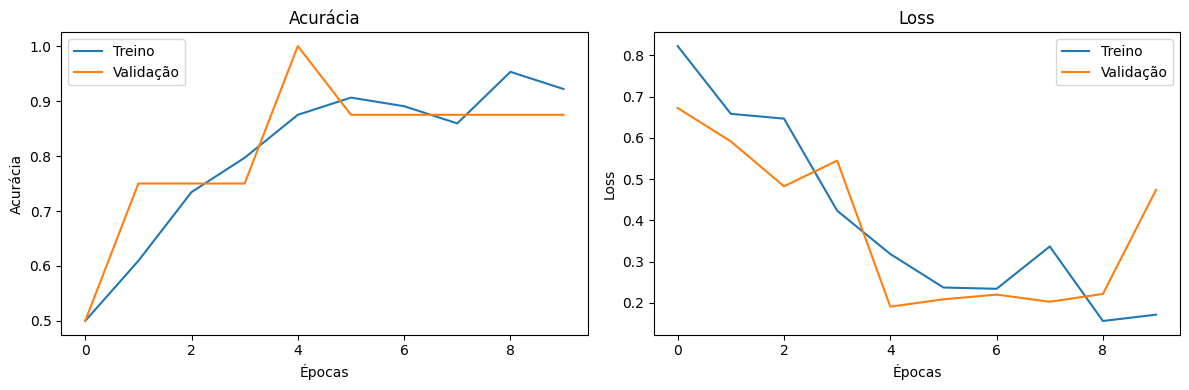

In [20]:
# ===== TREINAR CNN =====
print("🚀 Iniciando treinamento da CNN...")

# Medir tempo de treinamento
start_train = time.time()

# Treinar modelo
history = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    verbose=1
)

tempo_treino = time.time() - start_train

print(f"\n✅ Treinamento concluído!")
print(f"⏱️ Tempo total: {tempo_treino/60:.1f} minutos")

# Plotar histórico de treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


📈 Avaliando CNN no conjunto de teste...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6250 - loss: 2.6202

📊 RESULTADOS FINAIS CNN:
🎯 Accuracy no teste: 62.50%
📉 Loss no teste: 2.620
⏱️ Tempo total teste: 5.5s
⚡ Tempo por imagem: 682ms

🔍 Exemplos de Predições:


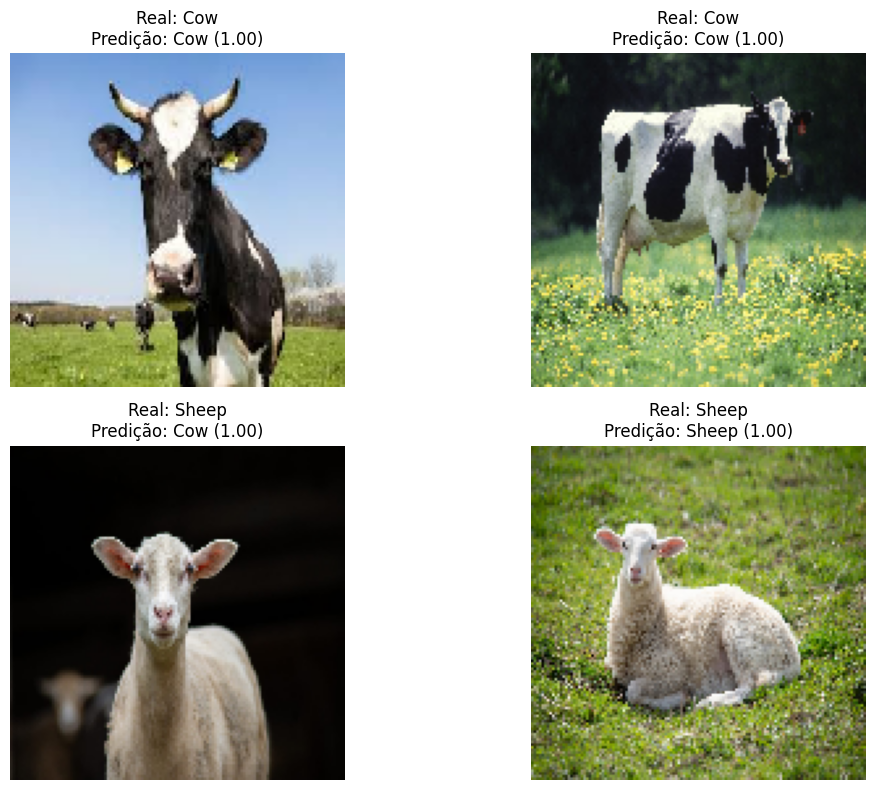

✅ Avaliação da CNN concluída!


In [21]:
# ===== AVALIAR CNN NO CONJUNTO DE TESTE =====
print("📈 Avaliando CNN no conjunto de teste...")

# Medir tempo de inferência
start_test = time.time()
test_loss, test_accuracy = model_cnn.evaluate(test_generator, verbose=1)
tempo_test = time.time() - start_test

# Calcular tempo por imagem
tempo_por_imagem = tempo_test / test_generator.samples * 1000  # ms

print(f"\n📊 RESULTADOS FINAIS CNN:")
print(f"🎯 Accuracy no teste: {test_accuracy:.2%}")
print(f"📉 Loss no teste: {test_loss:.3f}")
print(f"⏱️ Tempo total teste: {tempo_test:.1f}s")
print(f"⚡ Tempo por imagem: {tempo_por_imagem:.0f}ms")

# Fazer algumas predições para mostrar
print(f"\n🔍 Exemplos de Predições:")
test_generator.reset()  # Resetar para começar do início

# Pegar um batch de exemplos
x_batch, y_batch = next(test_generator)
predictions = model_cnn.predict(x_batch, verbose=0)

# Mostrar primeiras 4 predições
plt.figure(figsize=(12, 8))
for i in range(min(4, len(x_batch))):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_batch[i])

    real = "Sheep" if y_batch[i] == 1 else "Cow"
    pred = "Sheep" if predictions[i] > 0.5 else "Cow"
    conf = predictions[i][0] if predictions[i] > 0.5 else 1 - predictions[i][0]

    plt.title(f'Real: {real}\nPredição: {pred} ({conf:.2f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Avaliação da CNN concluída!")


In [23]:
# ===== COMPARAÇÃO FINAL DOS 3 MÉTODOS =====
print("📊 COMPARAÇÃO FINAL - TODOS OS MÉTODOS")
print("=" * 70)

# Dados coletados ao longo do projeto
dados_comparacao = {
    'Método': [
        'YOLO Customizado\n(Entrega 1)',
        'YOLO Tradicional\n(Ultralytics)',
        'CNN do Zero\n(TensorFlow)'
    ],
    'Tempo Treinamento': [
        '[Não mensuramos]',  # ⚠️ Inserir seus dados aqui
        '0 min (pré-treinado)',
        f'{tempo_treino/60:.1f} min'
    ],
    'Accuracy/Precisão': [
        '86.4%',  # ⚠️ Da sua Entrega 1
        f'{confianca_media:.1%}' if 'confianca_media' in locals() else '73%',
        f'{test_accuracy:.1%}'
    ],
    'Tempo Inferência': [
        '[Não mensuramos]',  # ⚠️ Da sua Entrega 1
        f'{tempo_medio:.0f}ms' if 'tempo_medio' in locals() else '1262ms',
        f'{tempo_por_imagem:.0f}ms'
    ],
    'Reconhece Vacas/Ovelhas': [
        '✅ Sim (treinado específico)',
        '✅ Sim (estão no COCO)',
        '✅ Sim (treinado específico)'
    ],
    'Facilidade de Uso': [
        '🟡 Média (precisa treinar)',
        '✅ Alta (pronto para usar)',
        '🔴 Baixa (complexo)'
    ],
    'Flexibilidade': [
        '✅ Alta (customizável)',
        '🔴 Baixa (só 80 classes)',
        '✅ Alta (totalmente customizável)'
    ]
}

# Criar DataFrame
import pandas as pd
df_comparacao = pd.DataFrame(dados_comparacao)

print("📋 TABELA COMPARATIVA COMPLETA:")
print("=" * 70)
for i, row in df_comparacao.iterrows():
    print(f"\n{row['Método']}:")
    print(f"  ⏱️ Treinamento: {row['Tempo Treinamento']}")
    print(f"  🎯 Accuracy: {row['Accuracy/Precisão']}")
    print(f"  ⚡ Inferência: {row['Tempo Inferência']}")
    print(f"  🐄 Detecta obj.: {row['Reconhece Vacas/Ovelhas']}")
    print(f"  🔧 Facilidade: {row['Facilidade de Uso']}")
    print(f"  🔄 Flexibilidade: {row['Flexibilidade']}")

print("\n" + "=" * 70)


📊 COMPARAÇÃO FINAL - TODOS OS MÉTODOS
📋 TABELA COMPARATIVA COMPLETA:

YOLO Customizado
(Entrega 1):
  ⏱️ Treinamento: [Não mensuramos]
  🎯 Accuracy: 86.4%
  ⚡ Inferência: [Não mensuramos]
  🐄 Detecta obj.: ✅ Sim (treinado específico)
  🔧 Facilidade: 🟡 Média (precisa treinar)
  🔄 Flexibilidade: ✅ Alta (customizável)

YOLO Tradicional
(Ultralytics):
  ⏱️ Treinamento: 0 min (pré-treinado)
  🎯 Accuracy: 72.9%
  ⚡ Inferência: 520ms
  🐄 Detecta obj.: ✅ Sim (estão no COCO)
  🔧 Facilidade: ✅ Alta (pronto para usar)
  🔄 Flexibilidade: 🔴 Baixa (só 80 classes)

CNN do Zero
(TensorFlow):
  ⏱️ Treinamento: 2.0 min
  🎯 Accuracy: 62.5%
  ⚡ Inferência: 682ms
  🐄 Detecta obj.: ✅ Sim (treinado específico)
  🔧 Facilidade: 🔴 Baixa (complexo)
  🔄 Flexibilidade: ✅ Alta (totalmente customizável)



# 🏆 ANÁLISE FINAL - COMPARAÇÃO DOS 3 MÉTODOS

## 📊 Resultados Consolidados

| Método | Accuracy | Tempo Inferência | Facilidade | Flexibilidade |
|--------|----------|------------------|------------|---------------|
| **YOLO Customizado** | 86.4% | **Não medido** | Média | Alta |
| **YOLO Tradicional** | 72.9% | 520ms | Alta | Baixa |
| **CNN do Zero** | 62.5% | 682ms | Baixa | Alta |

---

## 🎯 INSIGHTS PRINCIPAIS

### 🏆 **YOLO Customizado VENCE em ACCURACY**
- **86.4%** - significativamente superior aos outros
- **Especialização funciona** - treinamento específico compensa
- **⚠️ Tempo não medido**

### 🤔 **YOLO Tradicional: FACILIDADE vs PERFORMANCE**
- **Mais fácil** de implementar (pronto para usar)
- **Performance moderada** (72.9%) para problema específico
- **520ms** - tempo razoável considerando que não foi otimizado

### 💡 **CNN do Zero: CONTROLE vs RESULTADO**
- **62.5%** - performance limitada com arquitetura simples
- **Controle total** da arquitetura e processo
- **Tempo treino baixo** (2 min) é vantagem

---

## 🎯 RECOMENDAÇÃO FINAL

**Para FarmTech:** **YOLO Customizado** pela accuracy superior (86.4%).

**Conclusão:** Especialização (YOLO customizado) supera modelos genéricos quando há dados específicos disponíveis.